# Analisis de Datos de Marketing
### Para el desarollo de esta tarea vamos a realizar el analisis de los datos de marketing que hemos recibido para aplicar todo lo que hemos venido aprendiendo hasta ahora en el Bootcamp

## Fase 1: Limpieza y Preparación de Datos

### Primero vamos a importamos las librerias necesarias y el dataset

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import zscore

In [72]:
url = 'C:/Users/david.frigerio_softo/Documents/GitHub/Desafio-de-Marketing/data/marketingcampaigns.csv'
df = pd.read_csv(url, on_bad_lines='warn') # En este caso me daba un error de datos con mas columnas de las esperadas y como eran poco datos (5 o 6) los limpié a mano


C:\Users\david.frigerio_softo\AppData\Local\Temp\ipykernel_11404\274282082.py:2: ParserWarning: Skipping line 1003: expected 10 fields, saw 11

  df = pd.read_csv(url, on_bad_lines='warn') # En este caso me daba un error de datos con mas columnas de las esperadas y como eran poco datos (5 o 6) los limpié a mano


### A continuación voy a revisar las primeras y ultimas filas del dataset para tener una idea de la estructura de los datos

In [73]:
# Primeras files
df.head(5)

,campaign_name,start_date,end_date,budget,roi,type,target_audience,channel,conversion_rate,revenue
0,Public-key multi-tasking throughput,2023-04-01,2024-02-23,8082.3,0.35,email,B2B,organic,0.40,709593.48
1,De-engineered analyzing task-force,2023-02-15,2024-04-22,17712.98,0.74,email,B2C,promotion,0.66,516609.10
2,Balanced solution-oriented Local Area Network,2022-12-20,2023-10-11,84643.1,0.37,podcast,B2B,paid,0.28,458227.42
3,Distributed real-time methodology,2022-09-26,2023-09-27,14589.75,0.47,webinar,B2B,organic,0.19,89958.73
4,Front-line executive infrastructure,2023-07-07,2024-05-15,39291.9,0.30,social media,B2B,promotion,0.81,47511.35


In [74]:
# Ultimas filas
df.tail(10)

,campaign_name,start_date,end_date,budget,roi,type,target_audience,channel,conversion_rate,revenue
1026,Broken-date campaign,2023-13-01,2024-01-01,25000,0.45,email,B2B,organic,NaN,87500.0
1027,Negative ROI test,2022-10-10,2023-05-05,-10000,-0.20,podcast,B2C,referral,0.10,NaN
1028,Null-heavy campaign,2023-01-01,NaN,NaN,NaN,B2B,social media,NaN,NaN,NaN
1029,Future campaign,2025-01-01,2025-06-01,75000,0.90,webinar,B2C,promotion,0.65,200000.0
1030,Extra long name campaign test,2023-04-15,2023-09-15,30000,0.25,email,NaN,paid,0.40,45000.0
1031,No revenue campaign,2023-02-01,2023-08-01,20000,0.30,social media,B2B,organic,0.50,NaN
1032,Random mess,2023-06-06,NaN,100000,NaN,podcast,NaN,referral,NaN,300000.0
1033,Invalid budget,2022-12-01,2023-06-01,abc,NaN,email,B2C,promotion,0.20,50000.0
1034,Overlapping dates,2023-03-01,2022-12-31,60000,0.60,webinar,B2B,paid,0.70,90000.0
1035,Too many conversions,2023-05-01,2023-11-01,40000,0.80,social media,B2C,organic,1.50,120000.0


### Por el nombre de las ultimas 8 campañas ("typo in date", "duplicated campaign", etc) ya podemos ver que esos registros tienen algunas inconsistencias, lo tendremos en cuenta para la limpieza

### Ahora veremos los tipos de datos de cada columna y su coherencia

In [75]:
df.dtypes

campaign_name       object
start_date          object
end_date            object
budget              object
roi                float64
type                object
target_audience     object
channel             object
conversion_rate    float64
revenue            float64
dtype: object

Podemos ver que hay tipos de datos inconsistentes en las columnas start and end date y budge. Lo tenemos en cuenta para luego corregirlo.

### A continuación voy a revisar los valores faltantes y su distribución por columna

In [76]:
df.isnull().sum()

campaign_name      0
start_date         1
end_date           2
budget             3
roi                4
type               1
target_audience    2
channel            1
conversion_rate    4
revenue            3
dtype: int64

<Axes: >

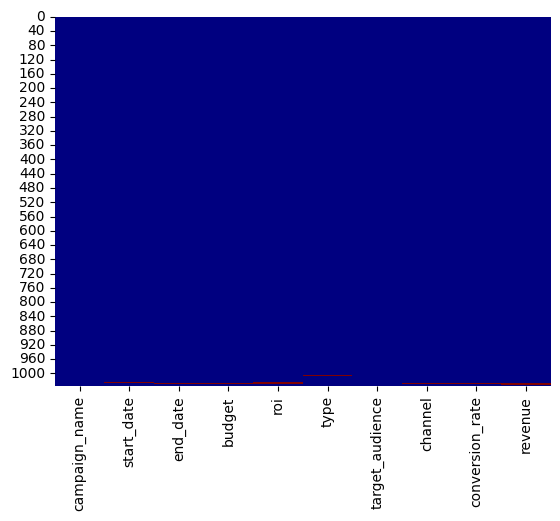

In [77]:
sns.heatmap(df.isnull(), cbar=False, linecolor='red', cmap='jet')

Veamnos la importancia de peso de los nulos por columna

In [78]:
df.isnull().sum() / df.shape[0] * 100

campaign_name      0.000000
start_date         0.096525
end_date           0.193050
budget             0.289575
roi                0.386100
type               0.096525
target_audience    0.193050
channel            0.096525
conversion_rate    0.386100
revenue            0.289575
dtype: float64

Antes de ver estadisticas descriptivas, vamos a corregir el tipo de dato de la columna budget que hemos visto que es inconsistente, de lo contrario no podremos hacer operaciones matematicas con esto

In [79]:
df['budget'] = df['budget'].astype('float', errors='ignore')
df.head(5)

,campaign_name,start_date,end_date,budget,roi,type,target_audience,channel,conversion_rate,revenue
0,Public-key multi-tasking throughput,2023-04-01,2024-02-23,8082.3,0.35,email,B2B,organic,0.40,709593.48
1,De-engineered analyzing task-force,2023-02-15,2024-04-22,17712.98,0.74,email,B2C,promotion,0.66,516609.10
2,Balanced solution-oriented Local Area Network,2022-12-20,2023-10-11,84643.1,0.37,podcast,B2B,paid,0.28,458227.42
3,Distributed real-time methodology,2022-09-26,2023-09-27,14589.75,0.47,webinar,B2B,organic,0.19,89958.73
4,Front-line executive infrastructure,2023-07-07,2024-05-15,39291.9,0.30,social media,B2B,promotion,0.81,47511.35


In [80]:
df.dtypes

campaign_name       object
start_date          object
end_date            object
budget              object
roi                float64
type                object
target_audience     object
channel             object
conversion_rate    float64
revenue            float64
dtype: object

In [81]:
df['budget'].sort_values(ascending=False)

1033         abc
1012     9999999
53      99957.15
330     99891.35
28      99838.63
          ...   
1032      100000
1027      -10000
1004         NaN
1007         NaN
1028         NaN
Name: budget, Length: 1036, dtype: object

Parece que la columna budget tiene un formato de string y no se ha corregido con la función astype, voy a probar con la función to_numeric

In [82]:
df['budget'] = pd.to_numeric(df['budget'], errors='coerce')
df.dtypes

campaign_name       object
start_date          object
end_date            object
budget             float64
roi                float64
type                object
target_audience     object
channel             object
conversion_rate    float64
revenue            float64
dtype: object

Bien, eso ha corregido el typo de dato de Budget. Vamos a ver ahora si este cambio ha generado muchos nulos o si ha eliminado muchos registros

In [83]:
df.isnull().sum()

campaign_name      0
start_date         1
end_date           2
budget             4
roi                4
type               1
target_audience    2
channel            1
conversion_rate    4
revenue            3
dtype: int64

In [84]:
df.__len__()

1036

In [85]:
df['budget'].sort_values(ascending=False)

1012    9999999.00
1032     100000.00
53        99957.15
330       99891.35
28        99838.63
           ...    
1027     -10000.00
1004           NaN
1007           NaN
1028           NaN
1033           NaN
Name: budget, Length: 1036, dtype: float64

Veamos algunas estadisticas descriptivas de las columnas numéricas para detectar posibles anomalias y outliers

In [86]:
df.describe()

,budget,roi,conversion_rate,revenue
count,1.032000e+03,1032.000000,1032.000000,1033.000000
mean,5.886964e+04,0.533353,0.541831,509895.192527
std,3.110969e+05,0.261558,0.267376,288055.421792
min,-1.000000e+04,-0.200000,0.000000,-15000.000000
25%,2.473549e+04,0.310000,0.300000,266449.670000
50%,4.686534e+04,0.530000,0.550000,517206.570000
75%,7.486708e+04,0.760000,0.770000,764590.330000
max,9.999999e+06,0.990000,1.500000,999712.490000


Vamos a ver la distribución de los valors numericos

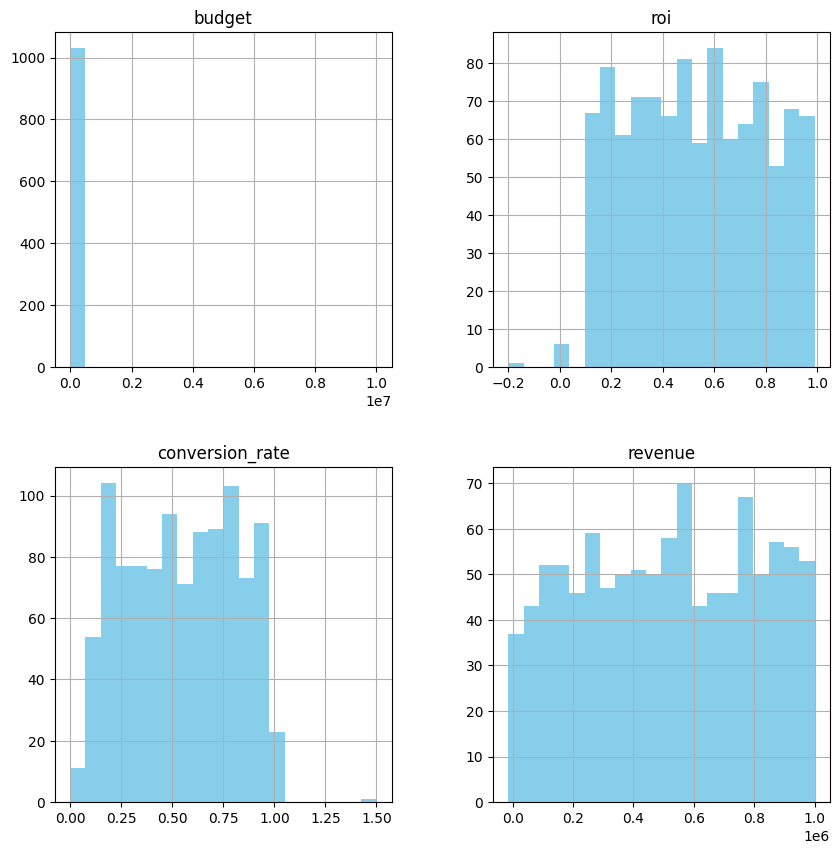

In [87]:
# Vamos a ver la distribución de los valors numericos
df.hist(figsize=(10,10), color='skyblue', bins=20)
plt.show()

Se pueden observar algunos outliers en conversion rate y ROI. Budget se ve muy extaño, voy a probar con un boxplot para ver mejor

<Axes: xlabel='budget'>

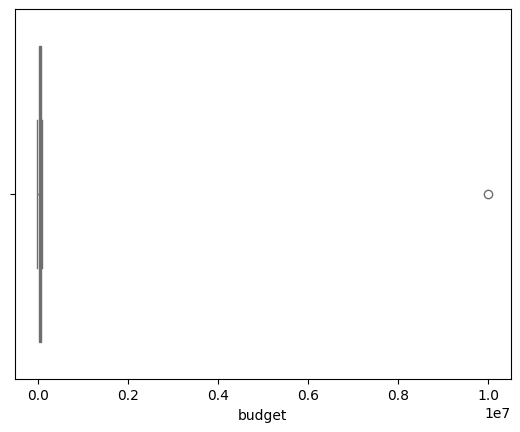

In [88]:
sns.boxplot(x=df['budget'], color='skyblue')

Me lo apunto para limpiar luego ya que hay unos outliers muy grandes en Budget, algunas tasas de ROI muy altas y algunos valores negativos en conversion rate, que no tiene sentido con la definición de la métrica.

### Veamos la cantidad de duplicados

In [89]:
df.duplicated(keep=False).sum()

np.int64(28)

### A ver si puedo ver los duplicados para darme una idea de como se ven

In [90]:
df_duplicados = df.duplicated(keep=False)
df[df_duplicados].sort_values(by='campaign_name')

,campaign_name,start_date,end_date,budget,roi,type,target_audience,channel,conversion_rate,revenue
1001,Balanced solution-oriented Local Area Network,2022-12-20,2023-10-11,84643.10,0.37,podcast,B2B,paid,0.28,458227.42
1015,Balanced solution-oriented Local Area Network,2022-12-20,2023-10-11,84643.10,0.37,podcast,B2B,paid,0.28,458227.42
2,Balanced solution-oriented Local Area Network,2022-12-20,2023-10-11,84643.10,0.37,podcast,B2B,paid,0.28,458227.42
11,Cross-platform demand-driven encoding,2023-07-21,2023-11-04,64041.37,0.16,social media,B2B,promotion,0.55,174462.47
1024,Cross-platform demand-driven encoding,2023-07-21,2023-11-04,64041.37,0.16,social media,B2B,promotion,0.55,174462.47
1,De-engineered analyzing task-force,2023-02-15,2024-04-22,17712.98,0.74,email,B2C,promotion,0.66,516609.10
1014,De-engineered analyzing task-force,2023-02-15,2024-04-22,17712.98,0.74,email,B2C,promotion,0.66,516609.10
1016,Distributed real-time methodology,2022-09-26,2023-09-27,14589.75,0.47,webinar,B2B,organic,0.19,89958.73
3,Distributed real-time methodology,2022-09-26,2023-09-27,14589.75,0.47,webinar,B2B,organic,0.19,89958.73
1002,Distributed real-time methodology,2022-09-26,2023-09-27,14589.75,0.47,webinar,B2B,organic,0.19,89958.73


Pues si, se ven unos 27 valores duplicados y claramente son datos de campañas repetidas, por lo que no tienen sentido. Vamos a apuntarlo para eliminarlo luego.

## Ahora veamos como se comportan las variables categoricas

Columna: type
type
email           289
webinar         268
social media    242
podcast         234
event             1
B2B               1
Name: count, dtype: int64


Columna: target_audience
target_audience
B2B             531
B2C             502
social media      1
Name: count, dtype: int64


Columna: channel
channel
promotion    281
referral     259
organic      250
paid         244
referal        1
Name: count, dtype: int64




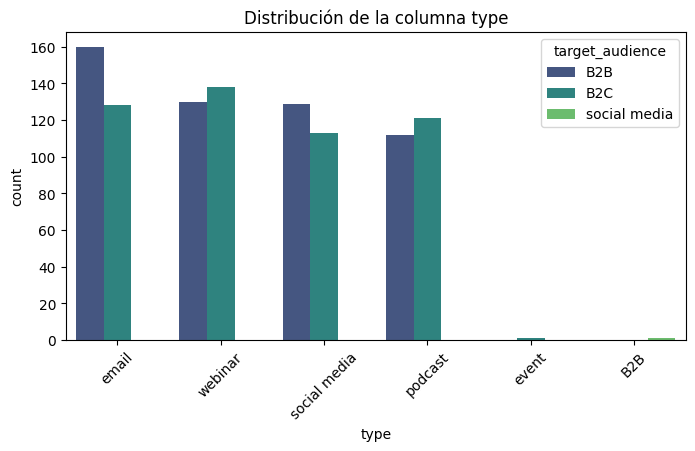

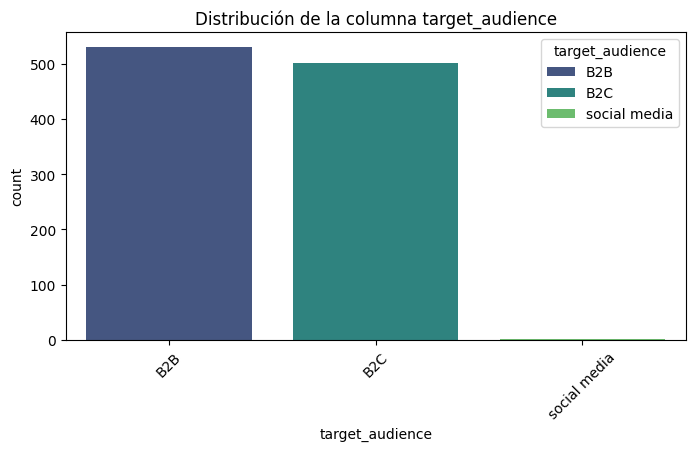

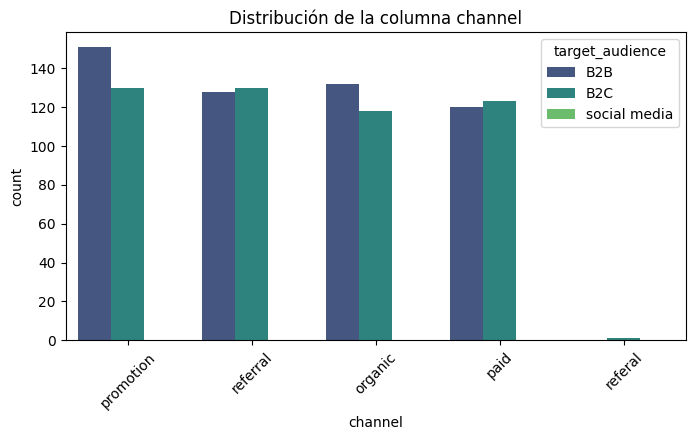

In [91]:
# Veamos la cantidad de valores únicos por cada columna categórica
categorical_columns = ['type', 'target_audience', 'channel']
for col in categorical_columns:
    print(f"Columna: {col}")
    print(df[col].value_counts())
    print("\n")

# Visualización de la distribución de las variables categóricas
for col in categorical_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='viridis', hue='target_audience')
    plt.title(f"Distribución de la columna {col}")
    plt.xticks(rotation=45)
    plt.show()

La columna channel tiene 4 valores unicos, y se ve correcta, sin embargo type, channel y target audience tienen valores que no corresponden a lo que deberian ser, vamos a tenerlo en cuenta para corregirlo luego

## Documentamos los problemas encontrados en esta fase y los coloco en orden de prioridad
- **Inconsistencia tipo de dato:** Tipo de dato incorrecto para start_date, end_date y budget (el de budget ya se corrigió para poder hacer analítica descritpiva)
- **Valores nulos:** Hay valores nulos en general pero para todas las columnas representa menos de un 1% de los datos, por lo que no es un problema grave
- **Outliers:** Hay outliers en conversion_rate y ROI, pero son pocos y podria limpiarse no parece ser un problema grave. Sin embargo, Buget tiene un comportamiento muy extraño y hay que revisar si los outliers son errores o quizás alguna campaña real con un budget muy alto, esto merece revisión.
- **Duplicados:** Hay 27 registros duplicados, no es un gran problema grave pero se deberían eliminar para no tener problemas en el análisis
- **Inconsistencia en valores:** Hay valores en type que no corresponden a lo que deberían ser, es apenas 1 registro asi que no representa un gran problema y podría limpiarse.

# Vamos a comenzar a limpiar los datos. Comenzamos con el manejo de los valores faltantes.

In [92]:
df.isnull().sum()

campaign_name      0
start_date         1
end_date           2
budget             4
roi                4
type               1
target_audience    2
channel            1
conversion_rate    4
revenue            3
dtype: int64

In [93]:
df.isnull().sum() / df.shape[0] * 100

campaign_name      0.000000
start_date         0.096525
end_date           0.193050
budget             0.386100
roi                0.386100
type               0.096525
target_audience    0.193050
channel            0.096525
conversion_rate    0.386100
revenue            0.289575
dtype: float64

Para start date y end date son muy pocos los valores nulos y su peso asi que se justifica eliminarlos ya que no tenemos una forma matemática para reemplazarlos. Se podria ver la relacion entre diferentes variables para estimar la duración promedio de una campaña en particular y si tenemos una de ambas fechas podriamos calcular la otra, pero mo merece la pena por la poca cantidad de nulos.

Para budget, reemplazaremos los nulos por un valor que represente la media para cada tipo de campaña/channel (organic, paid, referral, etc) y typo (email, podcast, webinar, etc)

In [94]:
df[df['budget'].isnull()]

,campaign_name,start_date,end_date,budget,roi,type,target_audience,channel,conversion_rate,revenue
1004,Upgradable transitional data-warehouse,2023-06-29,2023-12-13,NaN,0.59,social media,B2C,referral,0.67,558302.11
1007,NEW CAMPAIGN - Missing Budget,2023-10-01,2024-01-15,NaN,0.25,email,B2B,organic,NaN,45000.00
1028,Null-heavy campaign,2023-01-01,NaN,NaN,NaN,B2B,social media,NaN,NaN,NaN
1033,Invalid budget,2022-12-01,2023-06-01,NaN,NaN,email,B2C,promotion,0.20,50000.00


# Para budget vamos a reemplazar los nulos por la media de cada tipo de campaña y channel


In [95]:
df['budget'] = df['budget'].fillna(df.groupby(['channel', 'type'])['budget'].transform('mean'))

Vamos a comprobar si para alguno de los valores nulos que ha reemplazado para budget lo ha hecho bien

In [96]:
df.iloc[1004]

campaign_name      Upgradable transitional data-warehouse
start_date                                     2023-06-29
end_date                                       2023-12-13
budget                                       43114.585088
roi                                                  0.59
type                                         social media
target_audience                                       B2C
channel                                          referral
conversion_rate                                      0.67
revenue                                         558302.11
Name: 1004, dtype: object

In [97]:
df[(df['type'] == 'social media') & (df['channel'] == 'referral')]['budget'].mean()

np.float64(43114.58508771929)

Pues si, vemos que para el registro 1004 que antes era nulo, ahora tiene un valor de budget que parece coherente con el promedio de 43114.58 de la misma type y channel

# Para "type" vamos ver si podemos reemplazar con el valor 'unknown' o utilizar técnicas de imputación basadas en otras variables

In [98]:
df[(df['type'] == 'event') | (df['type'] == 'B2B')]

,campaign_name,start_date,end_date,budget,roi,type,target_audience,channel,conversion_rate,revenue
1025,Cloud-based scalable solution,NaN,2023-12-31,50000.0,NaN,event,B2C,paid,0.3,120000.0
1028,Null-heavy campaign,2023-01-01,NaN,NaN,NaN,B2B,social media,NaN,NaN,NaN


Para el registro 1028 pdemos ver que se ha cometido un error y las columnas type y target_audience estan invertidas, vamos a corregirlo

In [99]:
df.loc[1028,'type']='social media'
df.iloc[1028]

campaign_name      Null-heavy campaign
start_date                  2023-01-01
end_date                           NaN
budget                             NaN
roi                                NaN
type                      social media
target_audience           social media
channel                            NaN
conversion_rate                    NaN
revenue                            NaN
Name: 1028, dtype: object

In [100]:
df.loc[1028,'target_audience']='B2B'
df.iloc[1028]

campaign_name      Null-heavy campaign
start_date                  2023-01-01
end_date                           NaN
budget                             NaN
roi                                NaN
type                      social media
target_audience                    B2B
channel                            NaN
conversion_rate                    NaN
revenue                            NaN
Name: 1028, dtype: object

Vimos que habia una campaña con el channel "referal", pero el valor correcto es "referral", vamos a corregirlo

In [101]:
df[(df['channel'] == 'referal')]

,campaign_name,start_date,end_date,budget,roi,type,target_audience,channel,conversion_rate,revenue
1005,Innovative context-sensitive framework,2023-03-01,2024-02-23,28964.45,0.59,email,B2C,referal,0.17,172882.59


In [102]:
df.loc[1005,'channel']='referral'
df.iloc[1005]

campaign_name      Innovative context-sensitive framework
start_date                                     2023-03-01
end_date                                       2024-02-23
budget                                           28964.45
roi                                                  0.59
type                                                email
target_audience                                       B2C
channel                                          referral
conversion_rate                                      0.17
revenue                                         172882.59
Name: 1005, dtype: object

Vemos si ahora el channel está correcto:

In [103]:
categorical_columns = ['channel']
for col in categorical_columns:
    print(f"Columna: {col}")
    print(df[col].value_counts())
    print("\n")

Columna: channel
channel
promotion    281
referral     260
organic      250
paid         244
Name: count, dtype: int64




Veamos si encontramos correlación entre budget y conversion rate

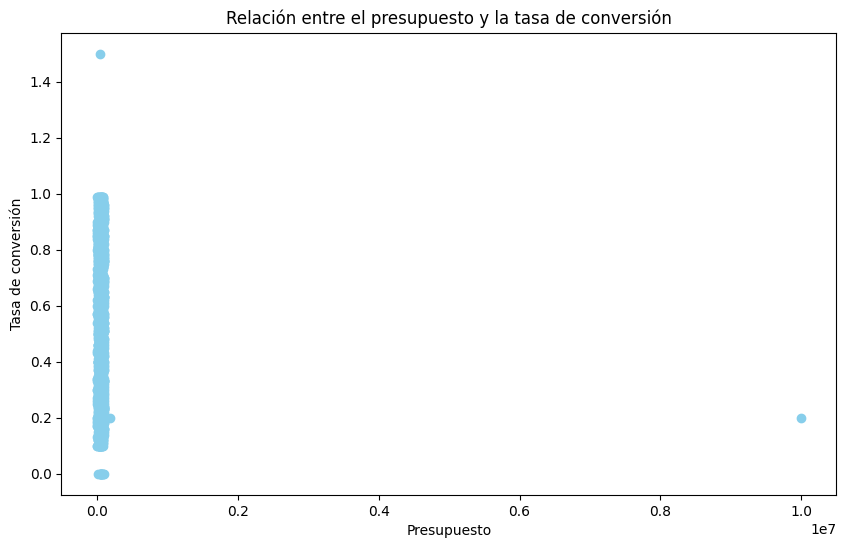

In [104]:
plt.figure(figsize=(10, 6))
plt.scatter(df['budget'], df['conversion_rate'], color='skyblue')
plt.title('Relación entre el presupuesto y la tasa de conversión')
plt.xlabel('Presupuesto')
plt.ylabel('Tasa de conversión')
plt.show()

Vamos a remover los outliers de budget de la visualizacion para verlo bien

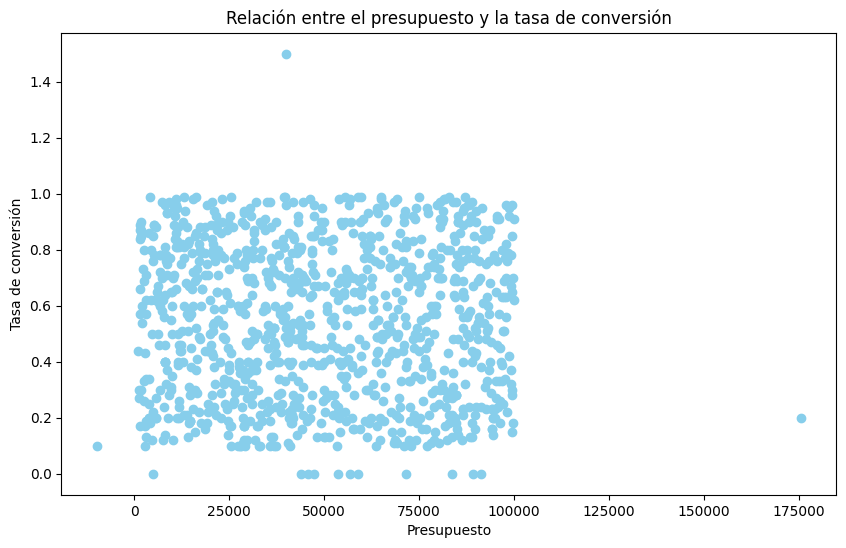

In [105]:
plt.figure(figsize=(10, 6))
plt.scatter(df[df['budget'] < 9000000]['budget'], df[df['budget'] < 9000000]['conversion_rate'], color='skyblue')
plt.title('Relación entre el presupuesto y la tasa de conversión')
plt.xlabel('Presupuesto')
plt.ylabel('Tasa de conversión')
plt.show()

Parece que no hay correlación entre budget y conversion rate, veamos todas las variables juntas con seaborn

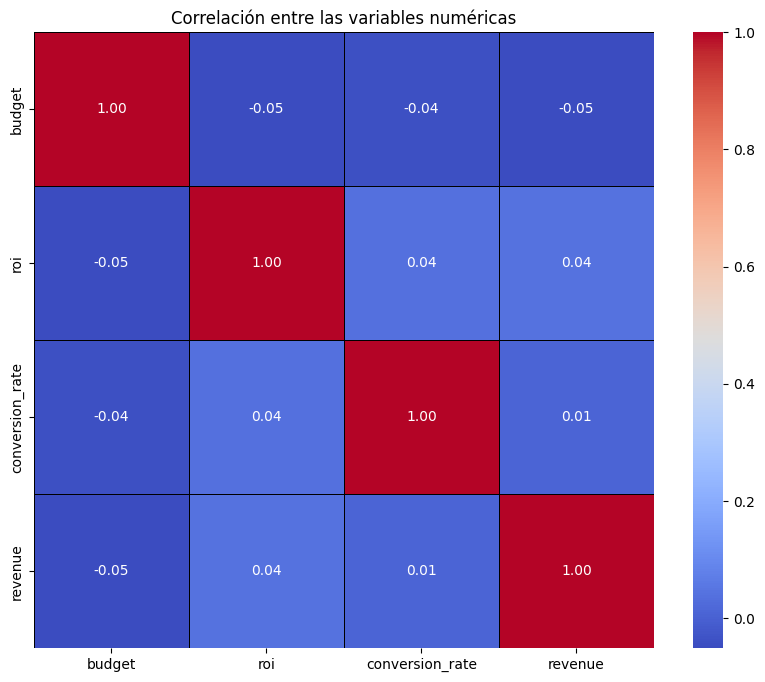

In [106]:
plt.figure(figsize=(10,8))
sns.heatmap(df.select_dtypes(include='number').corr(method='pearson'), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, linecolor='black')
plt.title('Correlación entre las variables numéricas')
plt.show()

No se ve una relación directa con otras variables. Podriamos estimar valores para ROI, budget, converstion rate y revenue en base al canal, tipo de campaña y audiencia objetivo, Son muy pocos valores nulos y podria eliminarse, pero a efectos de practicar y aprender lo  haré :D 


Comenzamos con los valores nulos de ROI

In [107]:
df.head(5)

,campaign_name,start_date,end_date,budget,roi,type,target_audience,channel,conversion_rate,revenue
0,Public-key multi-tasking throughput,2023-04-01,2024-02-23,8082.30,0.35,email,B2B,organic,0.40,709593.48
1,De-engineered analyzing task-force,2023-02-15,2024-04-22,17712.98,0.74,email,B2C,promotion,0.66,516609.10
2,Balanced solution-oriented Local Area Network,2022-12-20,2023-10-11,84643.10,0.37,podcast,B2B,paid,0.28,458227.42
3,Distributed real-time methodology,2022-09-26,2023-09-27,14589.75,0.47,webinar,B2B,organic,0.19,89958.73
4,Front-line executive infrastructure,2023-07-07,2024-05-15,39291.90,0.30,social media,B2B,promotion,0.81,47511.35


In [108]:
# Rellenamos los valores de ROI nulos con la mediana segun el canal, tipo y audiencia objetivo 
df['roi'] = df['roi'].fillna(df.groupby(['channel', 'type', 'target_audience'])['roi'].transform('mean'))
df.isnull().sum()


campaign_name      0
start_date         1
end_date           2
budget             1
roi                3
type               1
target_audience    2
channel            1
conversion_rate    4
revenue            3
dtype: int64

In [109]:
df[df['roi'].isnull()]

,campaign_name,start_date,end_date,budget,roi,type,target_audience,channel,conversion_rate,revenue
1025,Cloud-based scalable solution,NaN,2023-12-31,50000.0,NaN,event,B2C,paid,0.3,120000.0
1028,Null-heavy campaign,2023-01-01,NaN,NaN,NaN,social media,B2B,NaN,NaN,NaN
1032,Random mess,2023-06-06,NaN,100000.0,NaN,podcast,NaN,referral,NaN,300000.0


Puedo ver que solo me relleno un nulo de los 4 ya que los otros 3 no los puede calcular por algún motivo, continuaré eliminando el resto de nulos que son pocos y habíamos visto que eran menos del 1% de los datos para cada columna

In [110]:
df.dropna(inplace=True)
df.isnull().sum()

campaign_name      0
start_date         0
end_date           0
budget             0
roi                0
type               0
target_audience    0
channel            0
conversion_rate    0
revenue            0
dtype: int64

### Habiamos visto antes que los duplicados se ven bien y tiene sentido, los podemos eliminar

In [111]:
df.drop_duplicates(inplace=True)

In [112]:
# Reviso de nuevo a ver si hay duplicados ahora
df.duplicated(keep=False).sum()

np.int64(0)

Vemmos ahora si han cambiado mucho los datos luego de corregir, eliminar nulos y duplicados

In [113]:
df.describe()

,budget,roi,conversion_rate,revenue
count,1.010000e+03,1010.000000,1010.000000,1010.000000
mean,5.944428e+04,0.536497,0.544257,514654.922089
std,3.144430e+05,0.261660,0.267778,287405.899681
min,1.052570e+03,0.000000,0.000000,-15000.000000
25%,2.496908e+04,0.310000,0.300000,269175.202500
50%,4.719995e+04,0.540000,0.550000,521505.480000
75%,7.497455e+04,0.770000,0.770000,770589.310000
max,9.999999e+06,0.990000,1.500000,999712.490000


Vamos a corregir las fechas que vimos que no tenian el tipo de dato correcto

In [114]:
# I will cast the start  date
df['start_date'] = pd.to_datetime(df['start_date'], format='mixed', yearfirst=True, dayfirst=True)
df.dtypes

campaign_name              object
start_date         datetime64[ns]
end_date                   object
budget                    float64
roi                       float64
type                       object
target_audience            object
channel                    object
conversion_rate           float64
revenue                   float64
dtype: object

In [115]:
# I will cast the end date
df['end_date'] = pd.to_datetime(df['end_date'], format='mixed', yearfirst=True)
df.dtypes

DateParseError: day is out of range for month: 2024-02-30, at position 1001

Me da un error por que una fecha de febrero está mal, lo vamos a corregir a mano con el ultimo dia de febrero de 2024

In [116]:
#df[df['campaign_name'] == 'Typo in Date']['end_date'].replace('2024-02-29', value='date', inplace=True)
#df.loc[1001,'end_date'] = '2024-02-29'
#df.drop(1001, inplace=True)
df.reset_index(drop=True, inplace=True)
df.loc[1001]

campaign_name             Typo in Date
start_date         2023-01-13 00:00:00
end_date                    2024-02-30
budget                         50000.0
roi                               0.65
type                           webinar
target_audience                    B2C
channel                      promotion
conversion_rate                    0.9
revenue                       320000.0
Name: 1001, dtype: object

In [117]:
df.loc[1001,'end_date']='2024-02-29'
df.loc[1001]

campaign_name             Typo in Date
start_date         2023-01-13 00:00:00
end_date                    2024-02-29
budget                         50000.0
roi                               0.65
type                           webinar
target_audience                    B2C
channel                      promotion
conversion_rate                    0.9
revenue                       320000.0
Name: 1001, dtype: object

In [118]:
df.dtypes

campaign_name              object
start_date         datetime64[ns]
end_date                   object
budget                    float64
roi                       float64
type                       object
target_audience            object
channel                    object
conversion_rate           float64
revenue                   float64
dtype: object

In [119]:
# I will cast the end date
df['end_date'] = pd.to_datetime(df['end_date'], format='mixed', yearfirst=True)
df.dtypes

campaign_name              object
start_date         datetime64[ns]
end_date           datetime64[ns]
budget                    float64
roi                       float64
type                       object
target_audience            object
channel                    object
conversion_rate           float64
revenue                   float64
dtype: object

### Vamos a ver si hay algunos datos atipicos o anomalos

Miramos primero las distribuciones de las variables numericas

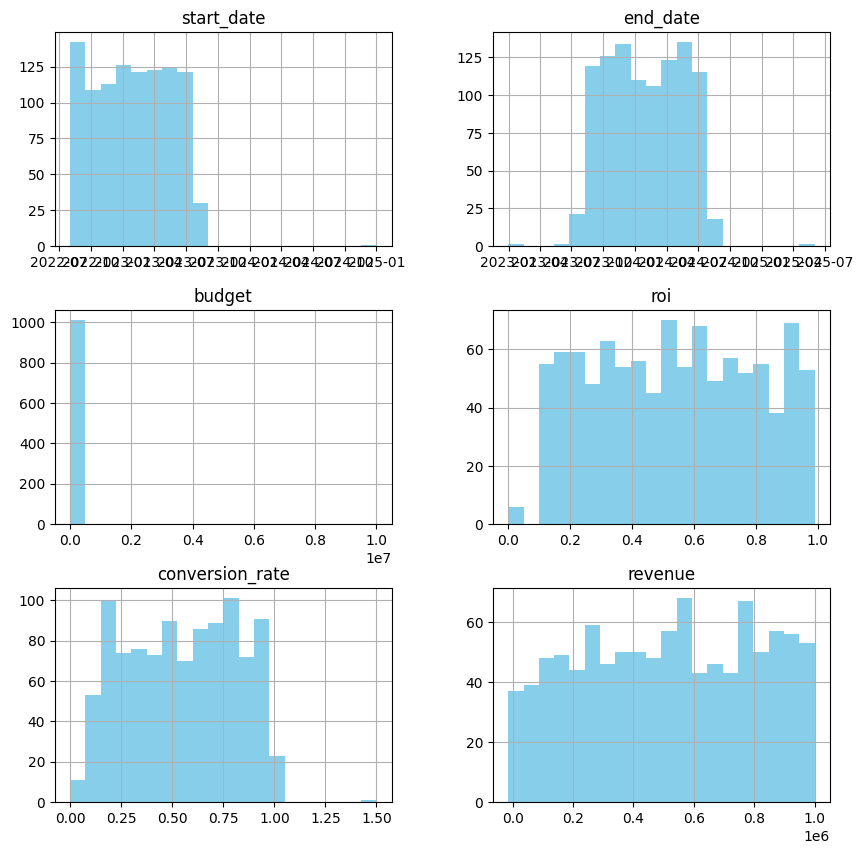

In [120]:
df.hist(figsize=(10,10), color='skyblue', bins=20)
plt.show()

Vamos a intentar usar tecnicas como IQR or Z-score para detectar outliers

In [121]:
# Lo siento, aqui he tirado de Copilot para acelerar un poco

# Detectar outliers usando IQR
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

# Detectar outliers usando z-score
def detect_outliers_zscore(data, column, threshold=3):
    z_scores = zscore(data[column])
    return data[(z_scores < -threshold) | (z_scores > threshold)]

# Aplicar las técnicas a las columnas numéricas
numeric_columns = ['budget', 'roi', 'conversion_rate', 'revenue']
for col in numeric_columns:
    print(f"Outliers en {col} usando IQR:")
    print(detect_outliers_iqr(df, col))
    print("\nOutliers en {col} usando z-score:")
    print(detect_outliers_zscore(df, col))

# Para las fechas, detectamos anomalías basándonos en rangos lógicos
print("Fechas de inicio fuera de rango lógico:")
print(df[(df['start_date'] < '2000-01-01') | (df['start_date'] > '2025-03-30')])

print("\nFechas de fin fuera de rango lógico:")
print(df[(df['end_date'] < '2000-01-01') | (df['end_date'] > '2025-12-31')])

Outliers en budget usando IQR:
       campaign_name start_date   end_date        budget       roi   type  \
1005  Outlier Budget 2023-07-01 2024-03-01  9.999999e+06  0.100000  email   
1007  Invalid budget 2022-12-01 2023-06-01  1.755962e+05  0.491944  email   

     target_audience    channel  conversion_rate  revenue  
1005             B2B  promotion              0.2  50000.0  
1007             B2C  promotion              0.2  50000.0  

Outliers en {col} usando z-score:
       campaign_name start_date   end_date     budget  roi   type  \
1005  Outlier Budget 2023-07-01 2024-03-01  9999999.0  0.1  email   

     target_audience    channel  conversion_rate  revenue  
1005             B2B  promotion              0.2  50000.0  
Outliers en roi usando IQR:
Empty DataFrame
Columns: [campaign_name, start_date, end_date, budget, roi, type, target_audience, channel, conversion_rate, revenue]
Index: []

Outliers en {col} usando z-score:
Empty DataFrame
Columns: [campaign_name, start_date, end

Vamos a eliminar los outliers identificados de budget y avisamos al departamento a cargo

In [122]:
# Eliminamos los outliers de budgets 1005 y 1007
df.drop([1005, 1007], inplace=True)

Buscamos outliers nuevamente 

In [123]:
# Aplicar las técnicas a las columnas numéricas
numeric_columns = ['budget', 'roi', 'conversion_rate', 'revenue']
for col in numeric_columns:
    print(f"Outliers en {col} usando IQR:")
    print(detect_outliers_iqr(df, col))
    print("\nOutliers en {col} usando z-score:")
    print(detect_outliers_zscore(df, col))

# Para las fechas, detectamos anomalías basándonos en rangos lógicos
print("Fechas de inicio fuera de rango lógico:")
print(df[(df['start_date'] < '2000-01-01') | (df['start_date'] > '2025-03-30')])

print("\nFechas de fin fuera de rango lógico:")
print(df[(df['end_date'] < '2000-01-01') | (df['end_date'] > '2025-12-31')])

Outliers en budget usando IQR:
Empty DataFrame
Columns: [campaign_name, start_date, end_date, budget, roi, type, target_audience, channel, conversion_rate, revenue]
Index: []

Outliers en {col} usando z-score:
Empty DataFrame
Columns: [campaign_name, start_date, end_date, budget, roi, type, target_audience, channel, conversion_rate, revenue]
Index: []
Outliers en roi usando IQR:
Empty DataFrame
Columns: [campaign_name, start_date, end_date, budget, roi, type, target_audience, channel, conversion_rate, revenue]
Index: []

Outliers en {col} usando z-score:
Empty DataFrame
Columns: [campaign_name, start_date, end_date, budget, roi, type, target_audience, channel, conversion_rate, revenue]
Index: []
Outliers en conversion_rate usando IQR:
             campaign_name start_date   end_date   budget  roi          type  \
1009  Too many conversions 2023-05-01 2023-11-01  40000.0  0.8  social media   

     target_audience  channel  conversion_rate   revenue  
1009             B2C  organic      

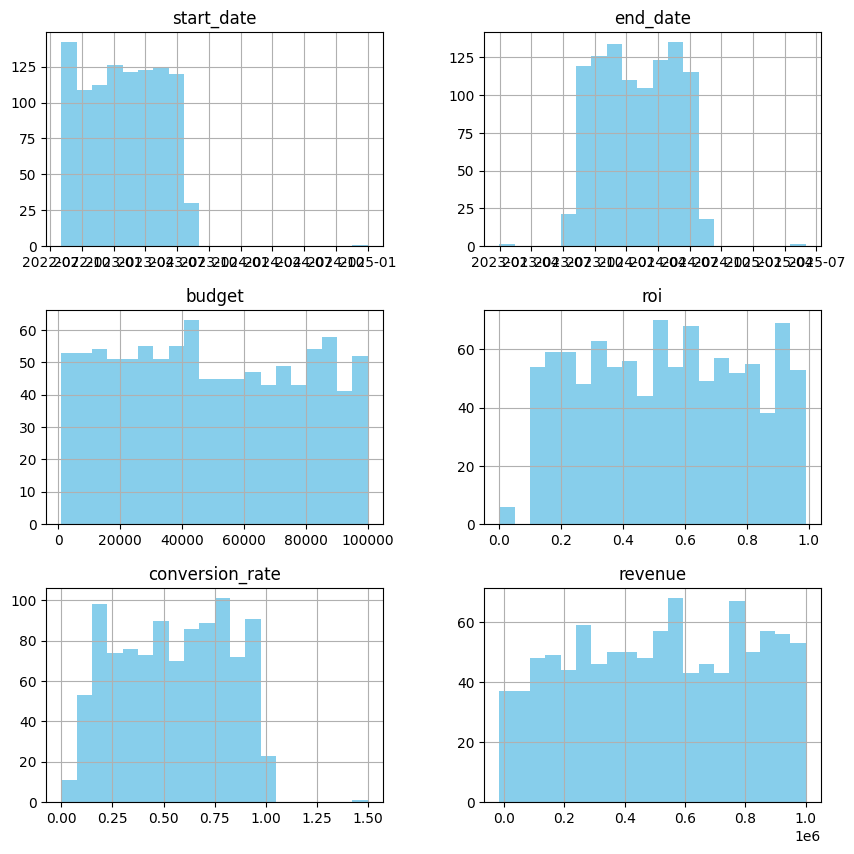

In [124]:
df.hist(figsize=(10,10), color='skyblue', bins=20)
plt.show()

Ya ha desaparecido el outlier de Budget, veamos end date y start date

In [125]:
df.sort_values(by='end_date', ascending=False).head(10)

,campaign_name,start_date,end_date,budget,roi,type,target_audience,channel,conversion_rate,revenue
1006,Future campaign,2025-01-01,2025-06-01,75000.00,0.90,webinar,B2C,promotion,0.65,200000.00
800,Robust maximized Graphic Interface,2022-09-17,2024-07-31,95291.59,0.30,social media,B2B,organic,0.27,804844.50
611,Integrated national architecture,2023-07-14,2024-07-31,32039.70,0.86,social media,B2B,referral,0.97,334033.28
989,Open-source fault-tolerant open architecture,2023-06-03,2024-07-31,29827.35,0.52,webinar,B2C,referral,0.36,310553.26
824,Profit-focused next generation installation,2023-03-12,2024-07-30,16505.53,0.21,podcast,B2C,paid,0.29,401190.17
954,Visionary composite task-force,2022-10-22,2024-07-30,68203.64,0.74,email,B2B,organic,0.56,931667.61
591,Implemented multi-tasking emulation,2022-11-13,2024-07-30,10934.43,0.26,webinar,B2C,promotion,0.66,892351.21
609,Intuitive well-modulated support,2022-08-14,2024-07-30,94357.67,0.80,email,B2C,organic,0.14,988161.51
290,Reactive zero tolerance core,2023-05-14,2024-07-29,75067.13,0.95,podcast,B2C,promotion,0.44,967358.10
257,Self-enabling reciprocal algorithm,2022-11-01,2024-07-29,8645.67,0.12,email,B2B,paid,0.37,961551.85


Eliminamos la future campaign ya que aún no ha concluido

In [126]:
df.drop([1006], inplace=True)

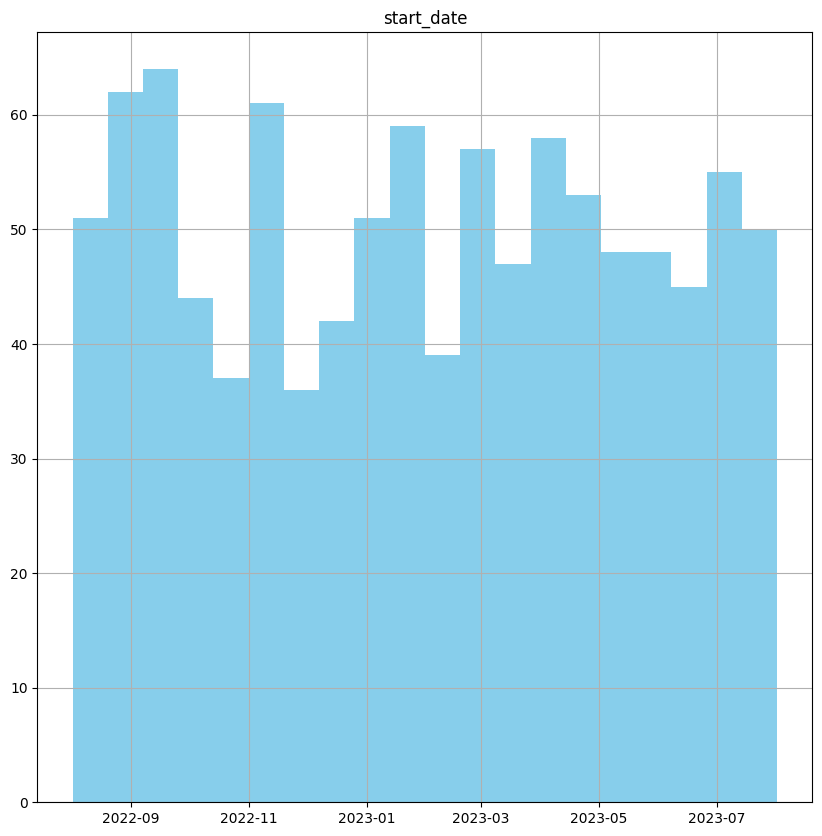

In [127]:
df.hist(figsize=(10,10), color='skyblue', bins=20, column='start_date')
plt.show()

vemos que Start date ya no tiene outliers, veamos ahora end date

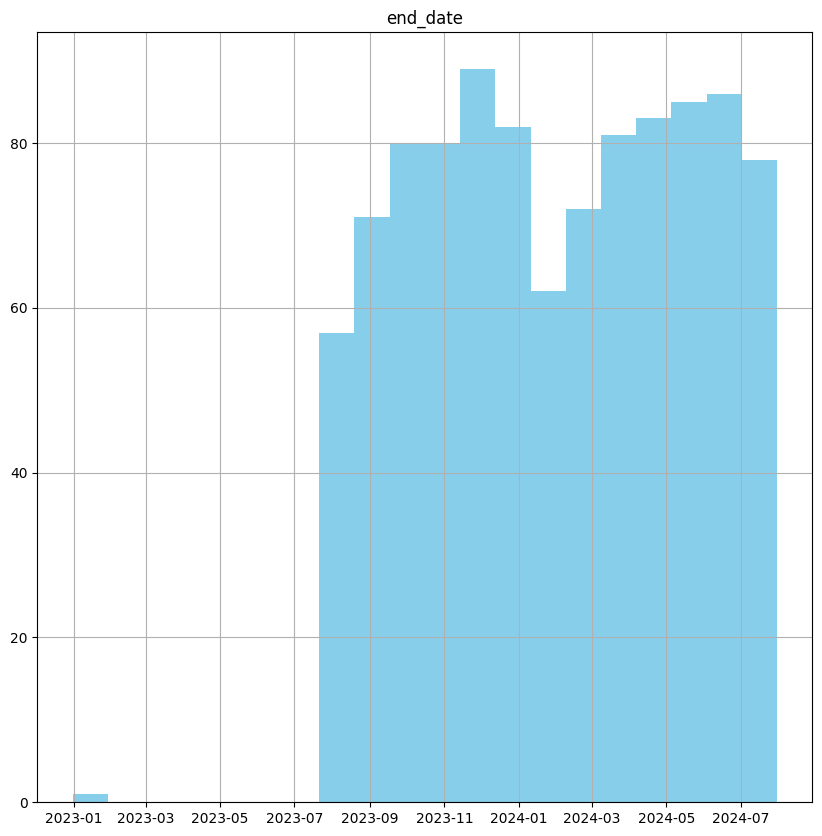

In [128]:
df.hist(figsize=(10,10), color='skyblue', bins=20, column='end_date')
plt.show()

In [129]:
df.sort_values(by='end_date', ascending=True).head(10)

,campaign_name,start_date,end_date,budget,roi,type,target_audience,channel,conversion_rate,revenue
1008,Overlapping dates,2023-03-01,2022-12-31,60000.00,0.60,webinar,B2B,paid,0.70,90000.00
918,Quality-focused fault-tolerant secured line,2023-02-01,2023-08-02,8324.30,0.68,webinar,B2C,promotion,0.76,875993.48
616,Synergized 24/7 interface,2022-11-09,2023-08-02,22675.22,0.52,webinar,B2B,referral,0.78,402920.91
289,Diverse asymmetric orchestration,2023-02-22,2023-08-02,86507.56,0.39,email,B2C,paid,0.40,468536.15
337,Re-engineered 24/7 benchmark,2022-10-07,2023-08-02,60761.56,0.60,podcast,B2C,paid,0.46,560912.60
526,Persevering tangible hardware,2023-06-08,2023-08-02,67475.35,0.50,email,B2B,promotion,0.22,53555.95
506,Quality-focused responsive framework,2023-07-10,2023-08-03,38390.23,0.72,podcast,B2B,paid,0.57,261442.83
344,Virtual methodical projection,2022-08-28,2023-08-03,2939.44,0.23,podcast,B2B,referral,0.34,517886.30
108,User-centric responsive software,2022-09-24,2023-08-04,55105.95,0.39,email,B2B,paid,0.65,980593.34
726,Team-oriented discrete benchmark,2023-03-16,2023-08-05,2970.45,0.71,webinar,B2C,promotion,0.19,712043.20


Hay una campaña que tiene fecha de inicio posterior a la fecha de fin, lo cual no tiene sentido, vamos a eliminarla y avisamos al departamento relevante

In [130]:
df.drop([1008], inplace=True)

Vemos ahora conversion Rate

In [131]:
df.sort_values(by='conversion_rate', ascending=False).head(15)

,campaign_name,start_date,end_date,budget,roi,type,target_audience,channel,conversion_rate,revenue
1009,Too many conversions,2023-05-01,2023-11-01,40000.00,0.80,social media,B2C,organic,1.50,120000.00
276,Function-based exuding strategy,2023-04-30,2024-02-25,87156.45,0.40,social media,B2C,referral,0.99,95274.70
140,Compatible eco-centric access,2022-08-24,2023-09-04,4016.62,0.62,social media,B2B,referral,0.99,773055.56
697,Customizable clear-thinking adapter,2023-07-22,2024-04-30,74856.71,0.43,podcast,B2B,referral,0.99,266833.31
504,Advanced client-driven matrix,2023-07-02,2024-06-24,58920.71,0.74,social media,B2B,organic,0.99,416433.63
785,Managed regional process improvement,2023-06-14,2023-09-19,65007.53,0.70,email,B2B,promotion,0.99,429137.69
984,Vision-oriented zero tolerance hardware,2023-01-13,2023-12-28,25534.30,0.90,email,B2C,paid,0.99,141758.95
712,Reverse-engineered attitude-oriented task-force,2023-03-12,2024-07-28,82832.93,0.73,social media,B2B,organic,0.99,974376.54
173,Customer-focused fault-tolerant help-desk,2022-10-08,2023-12-25,39585.98,0.11,podcast,B2B,promotion,0.99,889037.24
185,Progressive 4thgeneration policy,2022-10-06,2024-04-20,16290.70,0.49,webinar,B2C,promotion,0.99,172899.70


Tenemos la cmampaña "Too many conversions" que es claramente un outlier con un conversion rate de  1.5 y lo eliminamos

In [132]:
df.drop([1009], inplace=True)

Revisamo ROI

In [135]:
df.sort_values(by='roi', ascending=False).head(15)

,campaign_name,start_date,end_date,budget,roi,type,target_audience,channel,conversion_rate,revenue
949,Progressive motivating array,2023-02-18,2024-01-18,30951.13,0.99,email,B2C,referral,0.25,576624.43
47,User-friendly analyzing moratorium,2023-04-06,2024-03-16,20328.53,0.99,email,B2B,organic,0.97,658107.70
139,Face-to-face high-level synergy,2022-08-15,2024-06-03,98289.74,0.99,webinar,B2B,paid,0.79,811980.83
280,Automated 5thgeneration attitude,2023-02-05,2024-06-03,96380.65,0.99,email,B2B,referral,0.18,35031.43
530,Triple-buffered high-level customer loyalty,2023-01-01,2023-09-20,78803.16,0.99,email,B2B,organic,0.75,562224.77
205,Cross-group foreground ability,2023-03-11,2023-11-27,32343.79,0.99,social media,B2B,paid,0.50,55043.59
523,Synchronized zero administration structure,2023-04-15,2023-09-17,88977.21,0.99,podcast,B2B,promotion,0.13,396317.20
171,Grass-roots national approach,2022-08-29,2024-03-21,16063.49,0.99,email,B2B,promotion,0.69,868083.16
774,Future-proofed 4thgeneration core,2022-11-07,2024-04-07,17378.68,0.99,podcast,B2B,referral,0.88,746880.80
812,Realigned homogeneous support,2022-10-13,2024-03-03,24132.55,0.99,social media,B2C,paid,0.65,33543.21


Revisamos oultier a ver como va quedando

In [136]:
# Aplicar las técnicas a las columnas numéricas
numeric_columns = ['budget', 'roi', 'conversion_rate', 'revenue']
for col in numeric_columns:
    print(f"Outliers en {col} usando IQR:")
    print(detect_outliers_iqr(df, col))
    print("\nOutliers en {col} usando z-score:")
    print(detect_outliers_zscore(df, col))

Outliers en budget usando IQR:
Empty DataFrame
Columns: [campaign_name, start_date, end_date, budget, roi, type, target_audience, channel, conversion_rate, revenue]
Index: []

Outliers en {col} usando z-score:
Empty DataFrame
Columns: [campaign_name, start_date, end_date, budget, roi, type, target_audience, channel, conversion_rate, revenue]
Index: []
Outliers en roi usando IQR:
Empty DataFrame
Columns: [campaign_name, start_date, end_date, budget, roi, type, target_audience, channel, conversion_rate, revenue]
Index: []

Outliers en {col} usando z-score:
Empty DataFrame
Columns: [campaign_name, start_date, end_date, budget, roi, type, target_audience, channel, conversion_rate, revenue]
Index: []
Outliers en conversion_rate usando IQR:
Empty DataFrame
Columns: [campaign_name, start_date, end_date, budget, roi, type, target_audience, channel, conversion_rate, revenue]
Index: []

Outliers en {col} usando z-score:
Empty DataFrame
Columns: [campaign_name, start_date, end_date, budget, roi, 

Ya no parecen haber outliers con las tecnicas de IQR y Z-Score, veamos la grafica

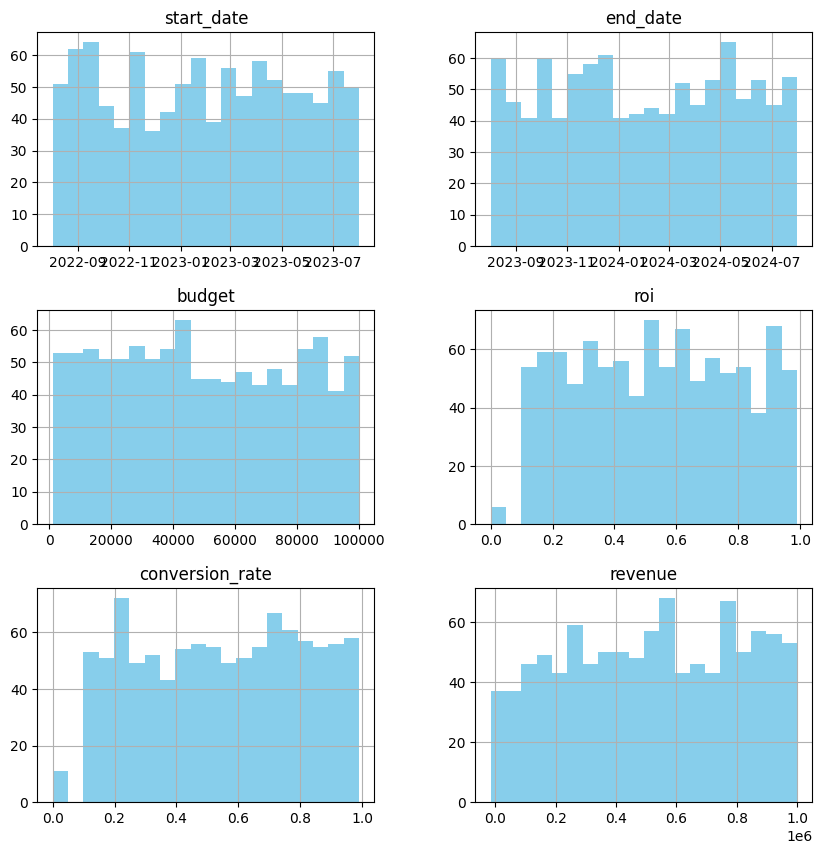

In [137]:
df.hist(figsize=(10,10), color='skyblue', bins=20)
plt.show()

## Vamos a crear variables derivadas ahora

In [138]:
df['net_profit'] = df['revenue'] - df['budget']
df.head(5)


,campaign_name,start_date,end_date,budget,roi,type,target_audience,channel,conversion_rate,revenue,net_profit
0,Public-key multi-tasking throughput,2023-04-01,2024-02-23,8082.30,0.35,email,B2B,organic,0.40,709593.48,701511.18
1,De-engineered analyzing task-force,2023-02-15,2024-04-22,17712.98,0.74,email,B2C,promotion,0.66,516609.10,498896.12
2,Balanced solution-oriented Local Area Network,2022-12-20,2023-10-11,84643.10,0.37,podcast,B2B,paid,0.28,458227.42,373584.32
3,Distributed real-time methodology,2022-09-26,2023-09-27,14589.75,0.47,webinar,B2B,organic,0.19,89958.73,75368.98
4,Front-line executive infrastructure,2023-07-07,2024-05-15,39291.90,0.30,social media,B2B,promotion,0.81,47511.35,8219.45


Extrae componentes temporales de la fecha (mes, trimestre, año) para análisis estacional

In [139]:
df['mes_inicio'] = df['start_date'].dt.month
df['mes_fin'] = df['end_date'].dt.month
df['año_inicio'] = df['start_date'].dt.year
df['año_fin'] = df['end_date'].dt.year
df['trimestre_inicio'] = df['start_date'].dt.quarter
df['trimestre_fin'] = df['end_date'].dt.quarter
df.head(5)

,campaign_name,start_date,end_date,budget,roi,type,target_audience,channel,conversion_rate,revenue,net_profit,mes_inicio,mes_fin,año_inicio,año_fin,trimestre_inicio,trimestre_fin
0,Public-key multi-tasking throughput,2023-04-01,2024-02-23,8082.30,0.35,email,B2B,organic,0.40,709593.48,701511.18,4,2,2023,2024,2,1
1,De-engineered analyzing task-force,2023-02-15,2024-04-22,17712.98,0.74,email,B2C,promotion,0.66,516609.10,498896.12,2,4,2023,2024,1,2
2,Balanced solution-oriented Local Area Network,2022-12-20,2023-10-11,84643.10,0.37,podcast,B2B,paid,0.28,458227.42,373584.32,12,10,2022,2023,4,4
3,Distributed real-time methodology,2022-09-26,2023-09-27,14589.75,0.47,webinar,B2B,organic,0.19,89958.73,75368.98,9,9,2022,2023,3,3
4,Front-line executive infrastructure,2023-07-07,2024-05-15,39291.90,0.30,social media,B2B,promotion,0.81,47511.35,8219.45,7,5,2023,2024,3,2


Vamos a crear categorías de rendimiento basadas en ROI y tasa de conversión

In [140]:
# Crear categorías para ROI
df['roi_category'] = pd.cut(df['roi'], bins=[-float('inf'), 0.3, 0.6, float('inf')], labels=['Bajo', 'Medio', 'Alto'])

# Crear categorías para la tasa de conversión
df['conversion_rate_category'] = pd.cut(df['conversion_rate'], bins=[-float('inf'), 0.3, 0.6, float('inf')], labels=['Bajo', 'Medio', 'Alto'])

# Crear una categoría combinada de rendimiento
def categorize_performance(row):
    if row['roi_category'] == 'Alto' and row['conversion_rate_category'] == 'Alto':
        return 'Excelente'
    elif row['roi_category'] in ['Medio', 'Alto'] and row['conversion_rate_category'] in ['Medio', 'Alto']:
        return 'Bueno'
    elif row['roi_category'] == 'Bajo' or row['conversion_rate_category'] == 'Bajo':
        return 'Regular'
    else:
        return 'Deficiente'

df['performance_category'] = df.apply(categorize_performance, axis=1)

# Mostrar las primeras filas para verificar
df[['roi', 'conversion_rate', 'roi_category', 'conversion_rate_category', 'performance_category']].head()

,roi,conversion_rate,roi_category,conversion_rate_category,performance_category
0,0.35,0.40,Medio,Medio,Bueno
1,0.74,0.66,Alto,Alto,Excelente
2,0.37,0.28,Medio,Bajo,Regular
3,0.47,0.19,Medio,Bajo,Regular
4,0.30,0.81,Bajo,Alto,Regular


In [141]:
df.head(5)

,campaign_name,start_date,end_date,budget,roi,type,target_audience,channel,conversion_rate,revenue,net_profit,mes_inicio,mes_fin,año_inicio,año_fin,trimestre_inicio,trimestre_fin,roi_category,conversion_rate_category,performance_category
0,Public-key multi-tasking throughput,2023-04-01,2024-02-23,8082.30,0.35,email,B2B,organic,0.40,709593.48,701511.18,4,2,2023,2024,2,1,Medio,Medio,Bueno
1,De-engineered analyzing task-force,2023-02-15,2024-04-22,17712.98,0.74,email,B2C,promotion,0.66,516609.10,498896.12,2,4,2023,2024,1,2,Alto,Alto,Excelente
2,Balanced solution-oriented Local Area Network,2022-12-20,2023-10-11,84643.10,0.37,podcast,B2B,paid,0.28,458227.42,373584.32,12,10,2022,2023,4,4,Medio,Bajo,Regular
3,Distributed real-time methodology,2022-09-26,2023-09-27,14589.75,0.47,webinar,B2B,organic,0.19,89958.73,75368.98,9,9,2022,2023,3,3,Medio,Bajo,Regular
4,Front-line executive infrastructure,2023-07-07,2024-05-15,39291.90,0.30,social media,B2B,promotion,0.81,47511.35,8219.45,7,5,2023,2024,3,2,Bajo,Alto,Regular


Vamos a calcular métricas de eficiencia como 'cost_per_conversion'


In [143]:
# Calcular el costo por conversión de una manera diferente
df['cost_per_conversion'] = df.apply(lambda row: row['budget'] / (row['conversion_rate'] * row['revenue']) if row['conversion_rate'] > 0 else None, axis=1)

# Mostrar las primeras filas para verificar
df[['revenue','budget', 'conversion_rate', 'cost_per_conversion']].head()

,revenue,budget,conversion_rate,cost_per_conversion
0,709593.48,8082.30,0.40,0.028475
1,516609.10,17712.98,0.66,0.051950
2,458227.42,84643.10,0.28,0.659709
3,89958.73,14589.75,0.19,0.853593
4,47511.35,39291.90,0.81,1.020988


In [144]:
df.head(5)

,campaign_name,start_date,end_date,budget,roi,type,target_audience,channel,conversion_rate,revenue,...,mes_inicio,mes_fin,año_inicio,año_fin,trimestre_inicio,trimestre_fin,roi_category,conversion_rate_category,performance_category,cost_per_conversion
0,Public-key multi-tasking throughput,2023-04-01,2024-02-23,8082.30,0.35,email,B2B,organic,0.40,709593.48,...,4,2,2023,2024,2,1,Medio,Medio,Bueno,0.028475
1,De-engineered analyzing task-force,2023-02-15,2024-04-22,17712.98,0.74,email,B2C,promotion,0.66,516609.10,...,2,4,2023,2024,1,2,Alto,Alto,Excelente,0.051950
2,Balanced solution-oriented Local Area Network,2022-12-20,2023-10-11,84643.10,0.37,podcast,B2B,paid,0.28,458227.42,...,12,10,2022,2023,4,4,Medio,Bajo,Regular,0.659709
3,Distributed real-time methodology,2022-09-26,2023-09-27,14589.75,0.47,webinar,B2B,organic,0.19,89958.73,...,9,9,2022,2023,3,3,Medio,Bajo,Regular,0.853593
4,Front-line executive infrastructure,2023-07-07,2024-05-15,39291.90,0.30,social media,B2B,promotion,0.81,47511.35,...,7,5,2023,2024,3,2,Bajo,Alto,Regular,1.020988


### Ya con eso hemos hecho lo siguiente:
- Importamos las librerias necesarias y el dataset
- Revisamos la descripción, los nulos, los repetidos
- Eliminamos los duplicados, con un total de 27, y para los datos raros hice varias cosas:
-- En algunos registros se habían invertido los datos de channel y type, y como eran pocos lo hice a mano
-- En otros casos, por el ejemplo el channel "referal" estaba mal escrito con una "r"  y he modificado el registro para que tenga dos "r"
-- Había algunas fechas de Febrero 30 que no existe, y la cambie a Febrero 29 ya que fue año bisiesto ese año 2024
- Para los nulos hice varias cosas:
-- Para practicar intenté rellenar los nulos del budget con el promedio del budget para otros registros para el mismo type y channel
-- El resto de nulos los eliminé, eran unos 15 registros ya que representaban menos del 15 de los datos 
- Hice el casting necesario para fechas, y floats
- Traté los outliers, sobre todo de budget, conversion rate, ROI, y fechas superpuestas y futuras, apenas 3 o 4 registros
- Calculé métricas derivadas

Ahora voy colocar el data set final limpio

In [145]:
df.to_csv('C:/Users/david.frigerio_softo/Documents/GitHub/Desafio-de-Marketing/data/marketingcampaigns_clean.csv', index=False)